In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import pandas as pd
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
# load data(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]

img_rows, img_cols = 28,28
read=pd.read_csv("C:/Users/helid/PycharmProjects/GujOCR/csv/train.csv").values
arr=np.array
arr = read.reshape(12524,28,28,1)
x_train=arr
readt=pd.read_csv("C:/Users/helid/PycharmProjects/GujOCR/csv/Test.csv").values
arrt=np.array
arrt = readt.reshape(9,28,28,1)
x_test=arrt
y_train=pd.read_csv("C:/Users/helid/PycharmProjects/GujOCR/csv/training_label.csv").values
y_test=pd.read_csv("C:/Users/helid/PycharmProjects/GujOCR/csv/Test_label.csv").values
# the data, split between train and test sets

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()


# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train=x_train
X_test=x_test

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=150)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/40
84/84 [==============================] - 4s 44ms/step - loss: 4.1783 - accuracy: 0.0199 - val_loss: 4.2737 - val_accuracy: 0.0000e+00
Epoch 2/40
84/84 [==============================] - 4s 42ms/step - loss: 3.9861 - accuracy: 0.0517 - val_loss: 3.7997 - val_accuracy: 0.0000e+00
Epoch 3/40
84/84 [==============================] - 4s 43ms/step - loss: 3.4274 - accuracy: 0.1282 - val_loss: 3.0575 - val_accuracy: 0.2222
Epoch 4/40
84/84 [==============================] - 4s 43ms/step - loss: 3.0653 - accuracy: 0.1963 - val_loss: 2.7243 - val_accuracy: 0.2222
Epoch 5/40
84/84 [==============================] - 4s 43ms/step - loss: 2.7691 - accuracy: 0.2538 - val_loss: 2.5863 - val_accuracy: 0.3333
Epoch 6/40
84/84 [==============================] - 4s 43ms/step - loss: 2.5358 - accuracy: 0.3013 - val_loss: 2.5900 - val_accuracy: 0.2222
Epoch 7/40
84/84 [==============================] - 4s 43ms/step - loss: 2.3304 - accuracy: 0.3513 - val_loss: 2.0305 - val_accuracy: 0.3333
Epoch

In [12]:
model.save("C:/Users/helid/PycharmProjects/GujOCR/model/CNN88.h5")
print("Saved model to disk")

Saved model to disk


In [22]:

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('C:/Users/helid/PycharmProjects/GujOCR/model/CNN88.h5')

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


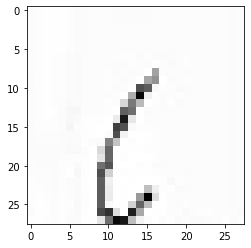

Predicted character is:૮


In [52]:

dict = {'ં': 0, 'ઃ': 1, 'અ': 2, 'અં': 3, 'અઃ': 4, 'આ': 5, 'ઇ': 6,
              'ઈ': 7, 'ઉ': 8, 'ઊ': 9, 'એ': 10, 'ઐ': 11, 'ઔ': 12, 'ક': 13,
              'ક્ષ': 14, 'ખ': 15, 'ગ': 16, 'ઘ': 17, 'ચ': 18, 'છ': 19, 'જ': 20,
              'જ્ઞ': 21, 'ઝ': 22, 'ટ': 23, 'ઠ': 24, 'ડ': 25, 'ઢ': 26, 'ણ': 27,
              'ત': 28, 'થ': 29, 'દ': 30, 'ધ': 31, 'ન': 32, 'પ': 33, 'ફ': 34,
              'બ': 35, 'ભ': 36, 'મ': 37, 'ય': 38, 'ર': 39, 'લ': 40, 'ળ': 41,
              'વ': 42, 'શ': 43, 'ષ': 44, 'સ': 45, 'હ': 46, 'ા': 47, 'િ': 48,
              'ી': 49, 'ુ': 50, 'ૂ': 51, 'ે': 52, 'ૈ': 53, 'ો': 54, 'ૌ': 55,
              '૦': 56, '૧': 57, '૨': 58, '૩': 59, '૪': 60, '૫': 61, '૬': 62,
              '૭': 63, '૮': 64, '૯': 65}
key_list = list(dict.keys()) 
val_list = list(dict.values()) 
example = x_test[7]
prediction = model.predict(example.reshape(1,28,28, 1))
print(prediction)
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
#print (hard_maxed_prediction)

plt.imshow(example.reshape(28,28), cmap="gray")
plt.show()
a = int(np.argmax(prediction))
print('Predicted character is:'+ list(dict.keys())[list(dict.values()).index(a)])
